In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [3]:
df = pd.read_csv('homeprices.csv')

In [22]:
df
df.columns
df.dtypes

area     int64
price    int64
dtype: object

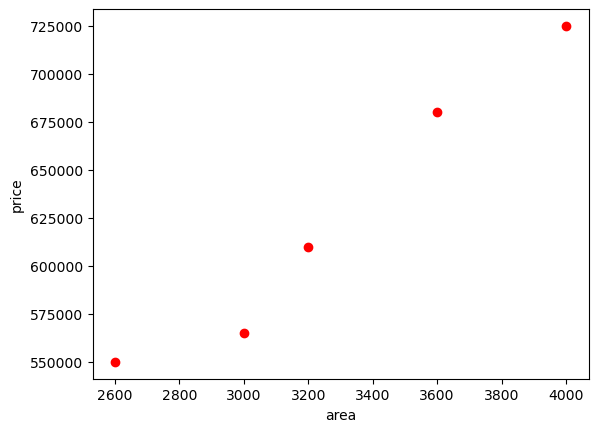

In [5]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red')


In [6]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [20]:
price = df.price 
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

Declaring a variable for Linear model

In [8]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

LinearRegression(copy_X=True, fit_Intercept=True, n_jobs=None, normalize=False)

In [9]:
#Predicting Price of a house with area 3300
reg.predict([[3300]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

180616.43835616432

In [12]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [13]:
#Predict for area of 5000
reg.predict([[5000]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

TESTING FOR NEW DATASET

In [14]:
area_df=pd.read_csv('areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [15]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
area_df['prices']=p

In [17]:
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [18]:
area_df.to_csv('prediction.csv')

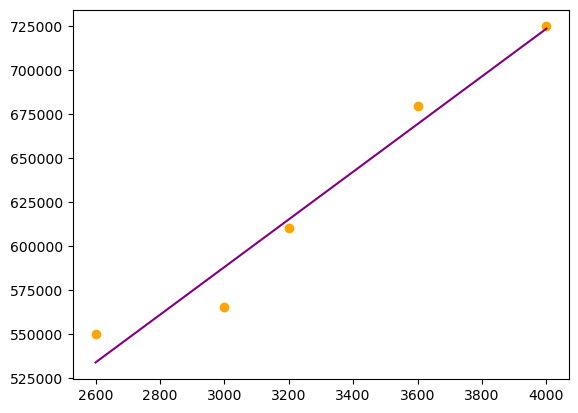

In [19]:
plt.plot(df.area,reg.predict(new_df),color='purple')
plt.scatter(df.area,df.price,color='orange')